In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/ds

/content/drive/My Drive/ds


In [ ]:
data = pd.read_csv('BG1.csv')

In [ ]:
data.shape

(534, 7)

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Timestamp                          534 non-null    object
 1   Username                           534 non-null    object
 2   Blood_Group                        534 non-null    object
 3   Mother's_Blood_Group               534 non-null    object
 4   Father's_Blood_Group               534 non-null    object
 5   Do you have any sibling/siblings?  534 non-null    object
 6   Sibling/siblings' Blood Group      499 non-null    object
dtypes: object(7)
memory usage: 29.3+ KB


In [ ]:
data['Blood_Group'].value_counts()

O+            178
B+            140
A+             91
Don't know     66
AB+            31
O-             12
A-              7
B-              6
AB-             3
Name: Blood_Group, dtype: int64

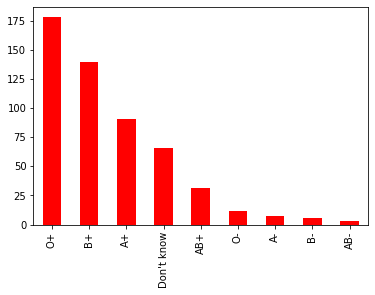

In [ ]:
data['Blood_Group'].value_counts().plot(kind='bar', color='red')

In [ ]:
data['Mother\'s_Blood_Group'].value_counts()

O+            157
B+            126
Don't know     98
A+             96
AB+            24
O-             14
B-             10
A-              8
AB-             1
Name: Mother's_Blood_Group, dtype: int64

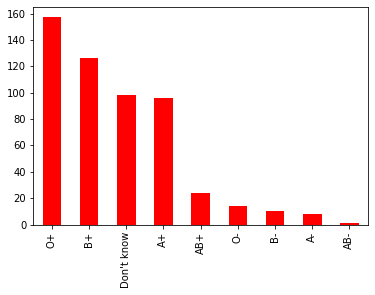

In [ ]:
data['Mother\'s_Blood_Group'].value_counts().plot(kind='bar', color='red')

In [ ]:
data['Father\'s_Blood_Group'].value_counts()

O+            177
B+            125
Don't know     96
A+             80
AB+            23
O-             17
B-              7
AB-             5
A-              4
Name: Father's_Blood_Group, dtype: int64

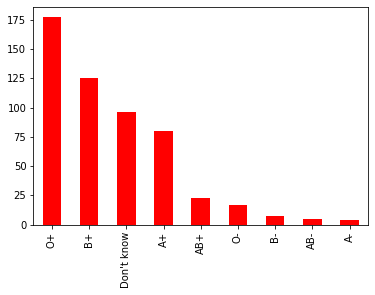

In [ ]:
data['Father\'s_Blood_Group'].value_counts().plot(kind='bar', color='red')

In [ ]:
# Dropping the unnecessary columns using drop method
data=data.drop(['Timestamp'],axis=1)
data=data.drop(['Sibling/siblings\' Blood Group'],axis=1)
data=data.drop(['Do you have any sibling/siblings?'],axis=1)
data=data.drop(['Username'],axis=1)

In [ ]:
# Removing Null Values using .loc function
data=data.loc[data["Blood_Group"] !='Don\'t know']
data.shape

(468, 3)

In [ ]:
data=data.loc[data["Mother's_Blood_Group"] !='Don\'t know']
data.shape

(407, 3)

In [ ]:
# Encoding the Dataset, i.e, assigning numeric values to categorical data using the LabelEncoder method
from sklearn.preprocessing import LabelEncoder
def Encoder(data):
          columnsToEncode = list(data.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  data[feature] = le.fit_transform(data[feature])
              except:
                  print('Error encoding '+feature)
          return data

In [ ]:
data=Encoder(data)
print(data)

     Blood_Group  Mother's_Blood_Group  Father's_Blood_Group
0              4                     6                     4
2              6                     6                     4
3              4                     5                     0
4              6                     6                     7
6              0                     0                     0
..           ...                   ...                   ...
527            0                     2                     6
529            4                     4                     7
530            0                     4                     0
531            6                     6                     7
533            2                     0                     0

[407 rows x 3 columns]


In [ ]:
data.head()

,Blood_Group,Mother's_Blood_Group,Father's_Blood_Group
0,4,6,4
2,6,6,4
3,4,5,0
4,6,6,7
6,0,0,0


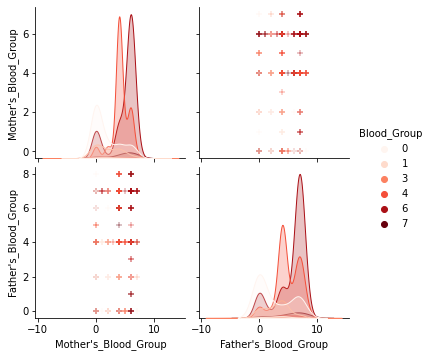

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data,hue='Blood_Group',markers='+', palette='Reds')
plt.show()

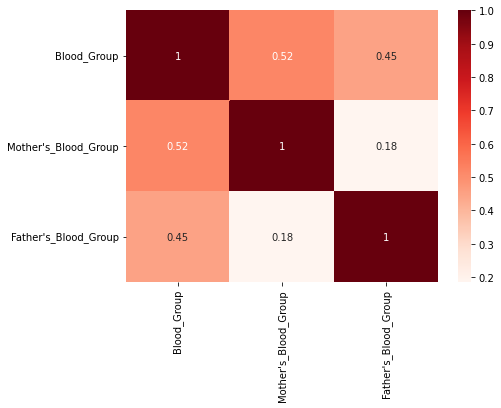

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True, cmap='Reds')
plt.show()

In [ ]:
# Defining the x and y datasets
X=data.drop(['Blood_Group'],axis=1)
y=data['Blood_Group']

In [ ]:
# Splitting the x and y sets into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=1)

Using different algorithms to train the data for maximum accuracy

In [ ]:
#Stochastic Gradient Descent
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd=linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)

sgd.score(X_train,y_train)

acc_sgd=round(sgd.score(X_train,y_train)*100,2)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

y_prediction=random_forest.predict(X_test)

random_forest.score(X_train,y_train)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,y_train)*100,2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,y_train)*100,2)

In [ ]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,y_train)*100,2)

In [ ]:
#perceptron
from sklearn.linear_model import Perceptron
perceptron=Perceptron(max_iter=30)
perceptron.fit(X_train,y_train)
y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,y_train)*100,2)

In [ ]:
#linear support vector machine
from sklearn.svm import SVC, LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,y_train)

y_pred=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train,y_train)*100,2)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,y_train)*100,2)

In [ ]:
results=pd.DataFrame({'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron','Stochastic Gradient Decent','Decision Tree'],'Score':[acc_linear_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,acc_decision_tree]})
result_df=results.sort_values(by='Score')
result_df=result_df.set_index('Score')
result_df.head(9)

,Model
Score,
33.23,Perceptron
40.92,Stochastic Gradient Decent
43.69,Support Vector Machines
47.08,Logistic Regression
55.38,Naive Bayes
67.38,KNN
68.92,Random Forest
68.92,Decision Tree


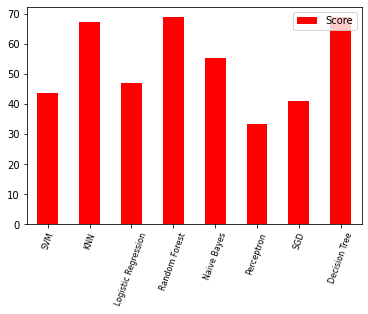

In [ ]:
results.plot(kind='bar', color='red')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['SVM', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'SGD', 'Decision Tree'], rotation=70, fontsize=8)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,X_train,y_train,cv=10,scoring="accuracy")

print("Scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores: [0.72727273 0.57575758 0.60606061 0.54545455 0.54545455 0.625
 0.71875    0.6875     0.65625    0.625     ]
Mean: 0.63125
Standard Deviation: 0.06259347922072239


In [ ]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_prediction=random_forest.predict(X_test)

random_forest.score(X_train,y_train)

acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
print(round(acc_random_forest,2,),"%")


68.92 %


In [ ]:
y_prediction

array([6, 1, 6, 4, 4, 1, 4, 6, 4, 6, 0, 2, 6, 4, 6, 4, 0, 6, 6, 2, 6, 4,
       6, 4, 0, 4, 6, 6, 6, 6, 0, 0, 4, 6, 0, 5, 6, 4, 6, 4, 4, 4, 0, 4,
       6, 0, 4, 4, 0, 6, 0, 3, 4, 4, 4, 0, 0, 6, 4, 6, 4, 6, 4, 0, 0, 4,
       4, 4, 6, 4, 4, 6, 6, 6, 6, 0, 4, 4, 0, 6, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[13,  1,  1,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  1, 17,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0],
       [ 4,  0,  0,  0, 10,  1, 21,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0]])

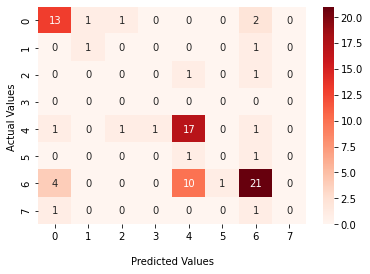

In [ ]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()